<a href="https://colab.research.google.com/github/Antoney20/MNIST-dataset/blob/main/colab_MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Import the Fashion MNIST dataset
The dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), 
Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.
links...                  
https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz               
https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz         
https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz               
https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.


In [3]:
#adding class names to the data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
#exploring the shape of the training data before training the model.
train_images.shape


(60000, 28, 28)

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.


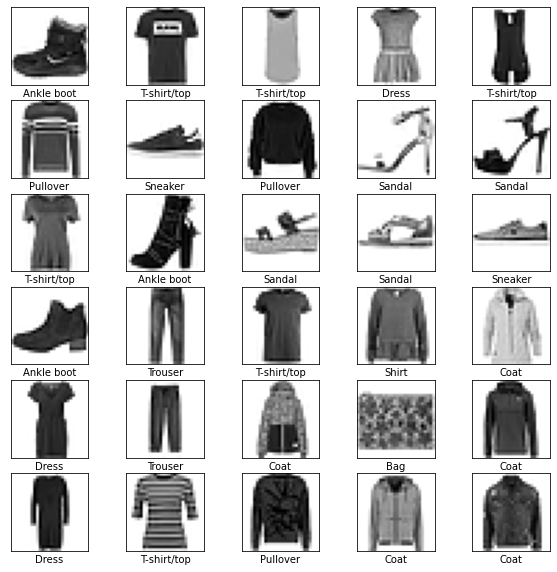

In [4]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Building the model**
Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.....
                                        

*   The first layer in this network, **tf.keras.layers.Flatten,**it  transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
*    After the pixels are flattened, the network consists of a sequence of two **tf.keras.layers.Dense layers**. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.   

                                                                                                                                                     


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

**Compile the model**


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train the model**




*  Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays. 
*   The model learns to associate images and labels.


*   You ask the model to make predictions about a test set—in this example, the test_images array.
*   
Verify that the predictions match the labels from the test_labels array.





In [7]:
#Feed the model
#To start training, call the model.fit method—so called because it "fits" the model to the training data:
train = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 4.3141 - accuracy: 0.6780
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7748 - accuracy: 0.7077
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6625 - accuracy: 0.7467
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5818 - accuracy: 0.7944
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5423 - accuracy: 0.8132
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5201 - accuracy: 0.8214
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5135 - accuracy: 0.8289
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4923 - accuracy: 0.8343
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4948 - accuracy: 0.8311
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

**As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.83 (or about 84%) on the training data.**

** Now we evaluate the accuracy**

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 1s - loss: 0.5431 - accuracy: 0.8273 - 597ms/epoch - 2ms/step

Test accuracy: 0.8273000121116638

Test loss: 0.543073296546936


**It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data**

**Create a plot of accuracy and loss over time**

1.   **Model.fit()** returns a History object that contains a dictionary with everything that happened during training:



In [9]:
train_dict = train.history
train_dict.keys()


dict_keys(['loss', 'accuracy'])

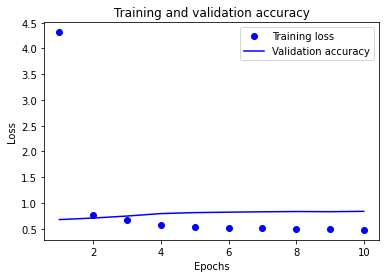

In [10]:
loss = train_dict['loss']
acc = train_dict['accuracy']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Make prediction**

*   With the model trained, you can use it to make predictions about some images.  Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.





In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step
